In [2]:
# add necessary imports
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# constants

G = 4*np.pi**2

mass = {
    'sun': 1.0,
    'earth': 3.0034e-6,
    'moon': 3.6923e-7}

r0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([9.978977040419635E-01, 6.586825681892025E-02, -6.320430920521123E-06]),
    'moon': np.array([9.956768547953816E-01, 6.676030485840675E-02, 1.641093070596718E-04])
     }
v0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([-4.70015711e-01, 6.25165839e+00, -3.40817831e-04]),
    'moon': np.array([-0.55065949, 6.03534661, 0.01111456])
}


In [4]:
# functions
def F_gravity(ri, rj, mi, mj):
    rij = ri - rj
    
    scalarrij = math.sqrt(np.dot(rij,rij))
    
    unitvector = rij/scalarrij
    
    return (-G*mi*mj*unitvector)/(scalarrij**2)

def F_ES(rE):
    return F_gravity(rE,r0["sun"],mass["earth"],mass["sun"])

def F_EM(rE,rM):
    return F_gravity(rE,rM,mass["earth"],mass["moon"])
def F_ME(rE,rM):
    return -F_EM(rE,rM)
def F_MS(rM):
    return F_gravity(rM,r0["sun"],mass["moon"],mass["sun"])
def F_E(rE, rM):
    return F_ES(rE)+ F_EM(rE,rM)
def F_M(rE, rM):
    return F_MS(rM)+ F_ME(rE,rM)

def integrate_EM(tmax, dt=1e-3):
    i = 0
    rE = r0["earth"]
    vE = v0["earth"]
    rM = r0["moon"]
    vM = v0["moon"]
    rE_values = [r0["earth"]]
    rM_values = [r0["moon"]]
    while i <= tmax:
        rE = rE + vE*dt
        rM = rM + vM*dt
        vE += (F_E(rE,rM)*dt)/mass["earth"]
        vM += (F_M(rE,rM)*dt)/mass["moon"]
        rE_values.append(rE.copy())
        rM_values.append(rM.copy())
        i += dt
    return (rE_values,rM_values)


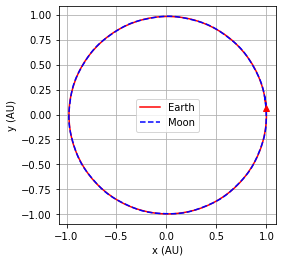

<Figure size 432x288 with 0 Axes>

In [5]:
if __name__ == "__main__":
    plt.figure()
    plt.gca().set_aspect("equal") 
    
    orbit2 = integrate_EM(1)
    xE = []
    yE = []
    xM = []
    yM = []
    
    
    for i in range(len(orbit2[0])):
        xE.append(orbit2[0][i][0])
        yE.append(orbit2[0][i][1])
        xM.append(orbit2[1][i][0])
        yM.append(orbit2[1][i][1])
    o1 = plt.plot(xE,yE,color = "red",label = "Earth")
    o2 = plt.plot(xM,yM,"b--",label = "Moon")
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    plt.legend()
    plt.plot(r0["earth"][0],r0["earth"][1], "r^")
    plt.grid()
    plt.show()
   
    plt.savefig('orbit_earth_moon.png')
